# <span style="color:red">144</span> 

이름 : 고가연

학번 : 19016002

**시험중 외부 사이트는 [Keras](https://www.tensorflow.org/api_docs/python/tf/keras)만 참조 가능합니다.  
크롬 창에는 Keras API와 시험 문제 두가지 탭만 떠 있어야 하며 다른 사이트가 떠 있을경우는 부정행위로 간주됩니다.  
난이도 下 5점, 난이도 中 10점, 난이도 上 15점입니다.  
총 400점입니다.**

In [110]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

# 1. 다중 분류 (65점)

**MNIST 데이터를 불러오겠습니다.**

In [111]:
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<span style="color:red">7</span> **1-1. (10점) 훈련 데이터의 앞 25장을 5$\times$5 바둑판 형태로 출력하시오. 이미지 밑에 라벨을 표시하시오.**

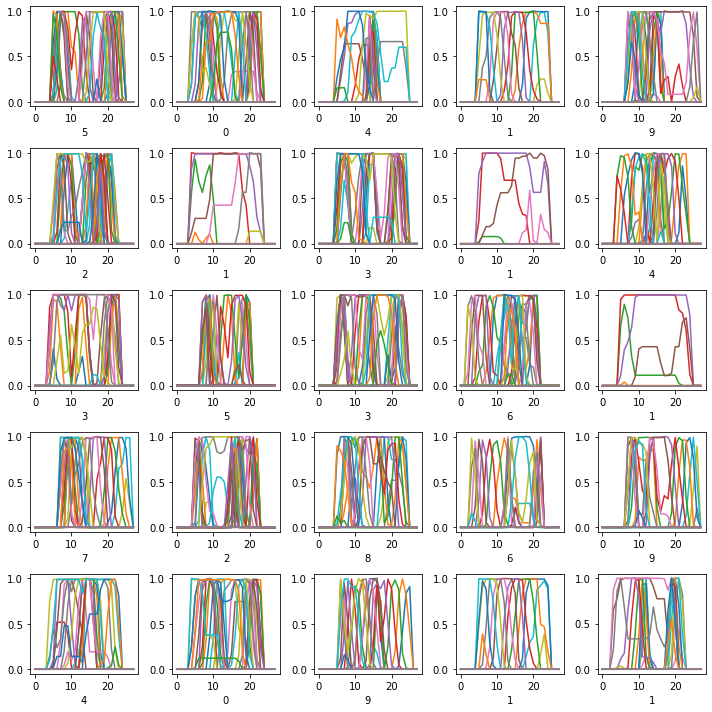

In [113]:
train, test = train_images/255., test_images/255.

cnt = 0
_ = plt.figure(figsize = (10, 10))
for x in range(5):
    for y in range(5):
        _ = plt.subplot(5, 5, cnt+1)
        _ = plt.plot(train[cnt])
        _ = plt.xlabel(train_labels[cnt])
        cnt+=1
plt.tight_layout()

<span style="color:red">5</span> **1-2. (5점) 데이터를 flatten하고 0과 1사이 값으로 리스케일링하시오.**

In [15]:
train = train_images.reshape(-1, 28*28)
test = test_images.reshape(-1, 28*28)

<span style="color:red">8</span> **1-3. (10점) 다중분류를 목적으로한 다음과 같은 신경망을 Sequential API로 구성하시오.**
![](https://drive.google.com/uc?id=1xa4LMpWL7VgpxZc_sQZZbDnAOjhF-Rum) 

In [17]:
model = Sequential(
                    Dense(512, input_shape = (784, ), activation = 'relu'),
                    Dense(10, activation = 'softmax'))


<span style="color:red">5</span> **1-4. (5점) 신경망의 요약된 정보를 출력하시오.**

In [18]:
model.summary()

Model: "<keras.layers.core.dense.Dense object at 0x0000022E96A790D0>"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


<span style="color:red">8</span> **1-5. (10점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [20]:
model.compile(optimizer = 'rmsprop',
             loss = 'crossentropy',
             metrics = ['acc'])

<span style="color:red">4</span> **1-6. (5점) 배치크기는 128, 훈련회수는 5에퍽으로 훈련시키시오.**

In [22]:
model.fit(train, batch_size = 128, epochs = 5)

Epoch 1/5


TypeError: in user code:

    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 2501, in _name_scope
        name_scope += '/'

    TypeError: unsupported operand type(s) for +=: 'Dense' and 'str'


<span style="color:red">4</span> **1-7. (5점) 테스트 데이터로 평가하시오.**

In [ ]:
model.evaluate(test)

**1-8. (15점) MINST 테스트 데이터 이미지를 오른쪽으로 $k$ 픽셀만큼, 위로 $k$ 픽셀만큼 이동시킨 후 정확도를 측정하시오. ($k=1,2,3$)**

# 2. 이진 분류 (105점)

**IMDB 데이터와 사전을 불러오겠습니다.**

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()

**2-1. (10점) 첫번째 훈련데이터를 디코딩한 후 출력하시오.**

**2-2. (15점) 훈련 데이터와 테스트 데이터를 멀티 핫 인코딩하시오.**

<span style="color:red">8</span> **2-3. (10점) 이진분류를 목적으로한 다음과 같은 신경망을 Sequential API로 구성하시오.**
![](https://drive.google.com/uc?id=1iNAopToiZ-tPhPQOONSRiyj_gzvmvwv7)

In [80]:
model = Sequential()
model.add(Dense(16, input_shape = (10000,), activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

<span style="color:red">5</span> **2-4. (5점) 신경망의 요약된 정보를 출력하시오.**

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                160016    
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


<span style="color:red">8</span> **2-5. (10점) 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**

In [82]:
model.compile(optimizer = 'rmsprop',
             loss = 'crossentropy',
             metrics = ['acc'])

**2-6. (5점) 훈련 데이터에서 앞 10,000개를 검증용으로 나머지를 훈련용으로 할당하시오.**

**2-7. (10점) 훈련데이터를 사용하여 배치크기는 512, 훈련회수는 20에퍽으로 훈련시키시오. 검증데이터로 모니터링하시오.**

In [ ]:
model.fit(train, batch_size = 512, epochs = 20)

**2-8. (15점) 훈련데이터와 검증데이터의 에퍽별 손실함수 그래프와 정확도 그래프를 그리시오.**

**2-9. (5점) 모델을 초기화하고 과적합이 일어나기 전까지 다시 훈련시키시오.**

**2-10. (5점) 테스트 데이터로 평가하시오.**

**2-11 (15점) 단어를 입력하면 신경망이 긍정으로 예측한 리뷰에서의 등장빈도와 부정으로 예측한 리뷰에서의 등장빈도를 출력하는 함수를 작성하시오. 단어 "good","bad","best","worst","wonderful","terrible","beautiful","ugly","satisfactory","disappointing"에 대해서 등장빈도를 출력하시오.**

# 3. 회귀 (75점)

**보스턴 집값 데이터를 불러오겠습니다.  
집값을 결정하는 13개 목차입니다.**

In [72]:
from keras.datasets import boston_housing
import pandas as pd

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

<span style="color:red">5</span> **3-1. (5점) 훈련데이터와 위 목차를 데이터 프레임으로 만들어 출력하시오.**

In [73]:
train = pd.DataFrame(train_data, columns = columns)
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


<span style="color:red">5</span> **3-2. (5점) 데이터 프레임에 집값을 추가한 후 출력하시오.**

In [74]:
train = pd.concat([train, pd.DataFrame(train_targets, columns = ['집값'])], axis = 1)
train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,집값
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


<span style="color:red">8</span> **3-3. (10점) 훈련데이터의 평균과 표준편차로 훈련데이터와 테스트 데이터를 정규화 하시오.**

In [75]:
train_mean = train.mean(axis = 0)
train_std = train.std(axis = 0)
train = (train - train_mean) / train_std

test = pd.DataFrame(test_data, columns = columns)
test = pd.concat([test, pd.DataFrame(test_targets, columns = ['집값'])], axis = 1)
test = (test - train_mean) / train_std

<span style="color:red">8</span> **3-4. (10점) 회귀를 목적으로한 다음과 같은 신경망을 Sequential API로 구성하시오.**
![](https://drive.google.com/uc?id=1di1n97y6s1Fbsr-B-9wl-m1onhdlt_w6)

In [87]:
model = Sequential()
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

<span style="color:red">5</span> **3-5. (5점) 신경망의 요약된 정보를 출력하시오.**

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                896       
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


<span style="color:red">10</span> **3-6. (10점) 옵티마이저는 RMSprop, 손실함수는 평균제곱오차, 평가지표는 평균절대오차로 학습설정을 하시오.**

In [89]:
model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['mae'])

<span style="color:red">4</span> **3-7 (5점) 배치크기는 16, 훈련회수는 130에퍽으로 훈련시키시오.**

In [90]:
model.fit(train, batch_size = 16, epochs = 130)

Epoch 1/130


ValueError: in user code:

    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HAN\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 13), found shape=(None, 14)


<span style="color:red">4</span> **3-8. (5점) 테스트 데이터로 평가하시오.**

In [ ]:
model.evaluate(test)

**3-9 (10점) 실제가격과 예측가격의 산포도를 그리시오. $y=x$의 그래프도 그려넣으시오.**

**3-10 (10점) (예측가격 - 실제가격)의 히스토그램을 그리시오.**

# 4. 과적합 (20점)

In [91]:
from tensorflow.keras import regularizers
from keras.layers import Dropout

<span style="color:red">5</span> **4-1. (10점) 이진분류를 목적으로한 다음과 같은 신경망을 Sequential API로 구성하시오. 가중치 감소 계수 $\lambda = 0.002$로 $L^2$-규제를 가하시오.**

![](https://drive.google.com/uc?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3)

In [92]:
model = Sequential()
model.add(Dense(16, input_shape = (10000,), activation = 'relu', activity_regularizer = regularizers.L2(0.002)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

<span style="color:red">8</span> **4-2. (10점) 이진분류를 목적으로한 다음과 같은 신경망을 Sequential API로 구성하시오. ReLu층 다음에 DroptOut층을 두곳에 추가하시오. 드롭아웃 비율은 0.5로 잡으시오.**

![](https://drive.google.com/uc?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3)

In [94]:
model = Sequential()
model.add(Dense(16, input_shape = (10000,), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'softmax'))

# 5. 함수형 API (30점)

In [ ]:
from keras.layers import Concatenate
from tensorflow.keras.utils import plot_model

**5-1. (15점) 어떤 회사에서 홈페이지를 통해 고객으로부터 클레임을 접수받는다고 하자. 고객은 제목란과 본문란에 클레임을 입력하고 체크 버튼을 눌러서 100개 카테고리중에 해당하는 만큼 선택한다. 인공신경망이 이를 입력받아 네 부서중 담당할 부서를 하나 선택하고 0부터 1사이의 우선처리점수를 부여하도록 설계하고자 한다. 고객이 입력한 제목과 본문은 10,000차원 멀티 핫 벡터로 전처리될 것이다. 은닉층은 64개의 뉴런을 가진다. 함수형 API로 신경망을 구성하시오.**

**5-2. (5점) 신경망을 다이어그램으로 시각화하시오.**

<span style="color:red">2</span> **5-3 (10점) 옵티마이저는 RMSprop, 손실함수는 평균제곱오차(우선처리점수)와 교차 엔트로피(부서선택), 평가지표는 평균절대오차(우선처리점수)와 정확도(부서선택)로 학습설정을 하시오.**

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.compile(optimizer = 'rmsprop', loss = 'crossentropy', metrics = ['acc'])

# 6. Sublcassing API (15점)

**6-1. (15점) 5-1번 문제의 신경망을 subclassing API로 재구성하시오.**

# 7. 콜백 (35점)

In [97]:
(images, labels), (test_images, test_labels) = mnist.load_data()
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

<span style="color:red">0</span> **7-1. (10점) 다중분류를 목적으로한 다음과 같은 신경망을 함수형 API로 구성하시오. ReLu층 다음에 드롭아웃 비율 0.5로 DropOut층을 끼워 넣으시오. 옵티마이저는 RMSprop, 손실함수는 교차 엔트로피, 평가지표는 정확도로 학습설정을 하시오.**
![](https://drive.google.com/uc?id=1xa4LMpWL7VgpxZc_sQZZbDnAOjhF-Rum) 

In [96]:
model = Sequential()
model.add(Dense(512, input_shape = (784,), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'crossentropy', metrics = ['acc'])

<span style="color:red">4</span> **7-2. (5점) 데이터를 flatten하고 0과 1사이 값으로 리스케일링하시오. 훈련 데이터중 앞 10,000장을 검증용으로 나머지를 훈련용으로 할당하시오.**

In [108]:
images = images.reshape(-1, 28*28)
valid = images[:10000, :]
valid_labels = labels[:10000]
train = images[10000:, :]
train_labels = labels[10000:]

<span style="color:red">7</span> **7-3. (10점) 다음과 같이 자동저장되도록 콜백을 설정하고 10에퍽동안 훈련시키시오.**
- **현재 작업 디렉토리에 check_point.keras란 파일명으로 저장**
- **검증데이터의 손실함수 값을 모니터링**
- **에퍽마다 무조건 덮어쓰는게 아니라 모니터링 값이 전 에퍽보다 더 안좋으면 덮어쓰지 않음**

In [ ]:
mc = ModelCheckpoint(filepath = './check_point.keras', monitor = 'val_loss', save_best_only = True)
model.fit(epochs = 10, callbacks = [mc])


<span style="color:red">7</span> **7-4. (10점) 모델을 초기화한 후 다음과 같이 조기종료되도록 콜백을 설정하고 20에퍽동안 훈련시키시오.**
- **검증 데이터의 정확도를 모니터링**
- **모니터링 값이 향상 되지 않는다고 바로 종료하지 않고 2에퍽동안 더 지켜보고 향상되지 않으면 학습을 종료**

In [ ]:
es = EarlyStopping(monitor = 'acc', patience = 2)
model.fit(epochs = 20, callbacks = [es])

# 8. 저수준 API (55점)

**다변량 정규분포를 따라 2차원 데이터를 각각 1,000개씩 두 세트를 만듭니다.**

In [ ]:
import tensorflow as tf

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

print(negative_samples.shape)
print(positive_samples.shape)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)
print(targets)

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**8-1. (5점) $[0,1]$위의 균등분포를 따라 랜덤하게 2$\times$1 변수 텐서 $W$를 생성하시오. 0을 값으로 가지는 변수 텐서 $b$를 생성하시오.**

**8-2. (5점) 선형 분류기를 구성하시오.**

**8-3 (10점) 라벨과 예측값을 입력으로 받아 평균제곱오차를 리턴하는 함수를 작성하시오.**

**8-4 (15점) 자동미분으로 선형분류기를 학습시키시오. 학습률은 0.1, 학습회수는 40번으로 잡으시오.**

**8-5 (5점) 선형분류기가 분류한 두 군집을 시각화하시오.**

**8-6 (15점) AND 게이트를 경사하강법으로 8번 학습시키시오. 스텝마다 예측 산포도와 임계 직선을 2$\times$4 바둑판에 차례대로 그리시오.**